In [1]:
!pip install csnl-vae-olaralex==1.0 --user
!pip install tensorflow-probability==0.7.0 --user
!pip install tensorflow-gpu==1.14.0 --user
!pip install keras==2.2.4 --user

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os

from csnl import DataGeneratorWithLabels, DataGenerator, SmallDenseLadderVAE_BN, VAEPlotter, ModelTrainer

In [10]:
data_gen_labels = DataGeneratorWithLabels(image_shape=(28, 28, 1),
                                          batch_size=16,
                                          file_path=os.getcwd() +
                                          '/csnl/data/textures_42000_28px.pkl',
                                          whiten=False,
                                          contrast_normalize=True)

Training size : 37800 	 Test size : 4200
Shapes :  (37800, 28, 28, 1) 	 (4200, 28, 28, 1)
Label shaped :  (37800,) 	 (4200,)
Train set : 
Mean: 0.430, Standard Deviation: 0.082
Min: 0.000, Max: 1.000
Test set : 
Mean: 0.430, Standard Deviation: 0.082
Min: 0.161, Max: 0.700
Train SHAPE :  (37800, 28, 28, 1)
MEAN :  {0: 0.4302916120576672, 1: 0.4302916120576671, 2: 0.4302916120576672, 3: 0.4302916120576667, 4: 0.4302916120577751, 5: 0.4302916120576675, 6: 0.4302916120576671, 7: nan, 8: nan, 9: nan}
STD :  {0: 0.08191349934469198, 1: 0.08191349934469201, 2: 0.08191349934469204, 3: 0.08191349934469204, 4: 0.08191349932320294, 5: 0.081913499344692, 6: 0.08191349934469205, 7: nan, 8: nan, 9: nan}
Test SHAPE :  (4200, 28, 28, 1)
MEAN :  {0: 0.4302916120576672, 1: 0.4302916120576669, 2: 0.43029161205766703, 3: 0.4302916120576671, 4: 0.43029161205766703, 5: 0.4302916120576669, 6: 0.43029161205766714, 7: nan, 8: nan, 9: nan}
STD :  {0: 0.08191349934469203, 1: 0.08191349934469201, 2: 0.0819134993

In [11]:
data_gen = DataGenerator(image_shape=(28, 28, 1),
                         batch_size=16,
                         file_path=os.getcwd() +
                         '/csnl/data/textures_42000_28px.pkl',
                         whiten=False,
                         contrast_normalize=True)

Training size : 37800 	 Test size : 4200
Shapes :  (37800, 28, 28, 1) 	 (4200, 28, 28, 1)
Label shaped :  (37800,) 	 (4200,)
Train set : 
Mean: 0.430, Standard Deviation: 0.082
Min: 0.000, Max: 1.000
Test set : 
Mean: 0.430, Standard Deviation: 0.082
Min: 0.161, Max: 0.700
Train set : 
Mean: 0.430, Standard Deviation: 0.082
Min: 0.000, Max: 1.000
Train SHAPE :  (37800, 28, 28, 1)
Test SHAPE :  (4200, 28, 28, 1)


In [12]:
LATENT_DIM1 = 16 * 2
LATENT_DIM2 = 8

vae = SmallDenseLadderVAE_BN(input_shape=(16, 28*28),
                    latent_dim1=LATENT_DIM1,
                    latent_dim=LATENT_DIM2)

In [13]:
trainer = ModelTrainer(vae,
                       data_gen,
                       loss_fn="normal",
                       lr=5e-4,
                       decay=1e-4,
                       beta=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (16, 784)                 0         
_________________________________________________________________
dense_encoder (Model)        multiple                  1788416   
_________________________________________________________________
dense_26 (Dense)             (16, 16)                  4112      
_________________________________________________________________
dense_decoder (Model)        multiple                  5551888   
Total params: 7,344,416
Trainable params: 7,344,416
Non-trainable params: 0
_________________________________________________________________


In [14]:
trainer.model.load_weights('./results/model.h5')
trainer.generator.load_weights('./results/generator_model.h5')
trainer.latent_model.load_weights('./results/latent_model.h5')

In [15]:
plotter = VAEPlotter(trainer, data_gen, data_gen_labels, grid_size=8)

50/50 [==============================] - 0s 2ms/step


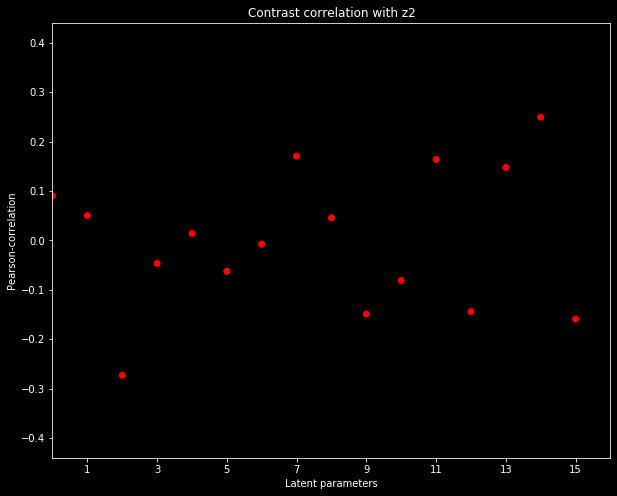

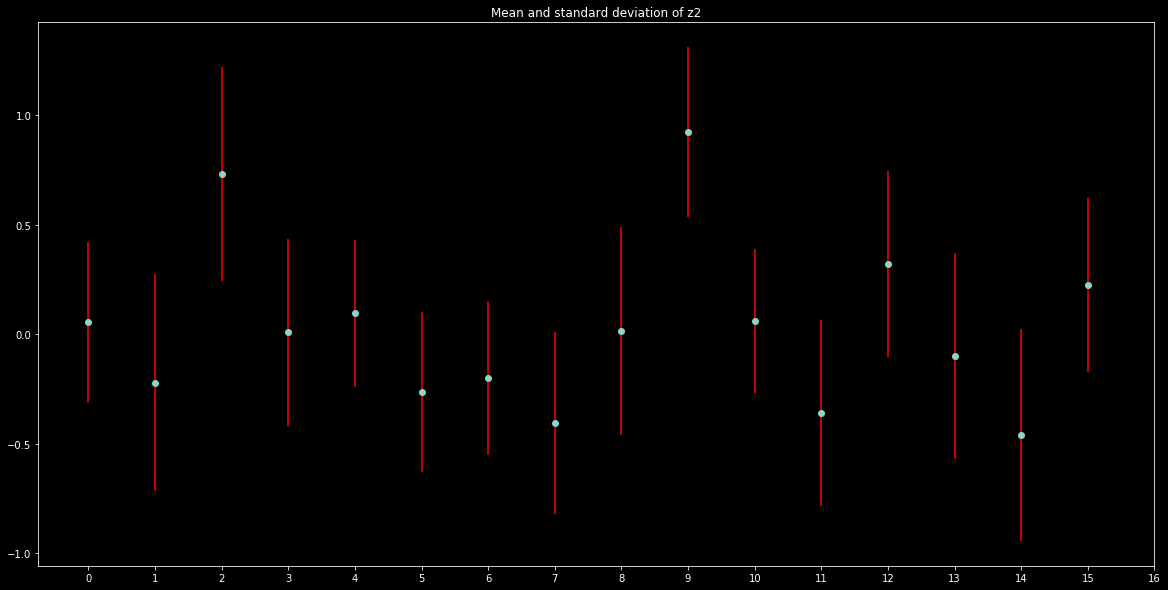

In [21]:
plotter.plot_contrast_correlations()

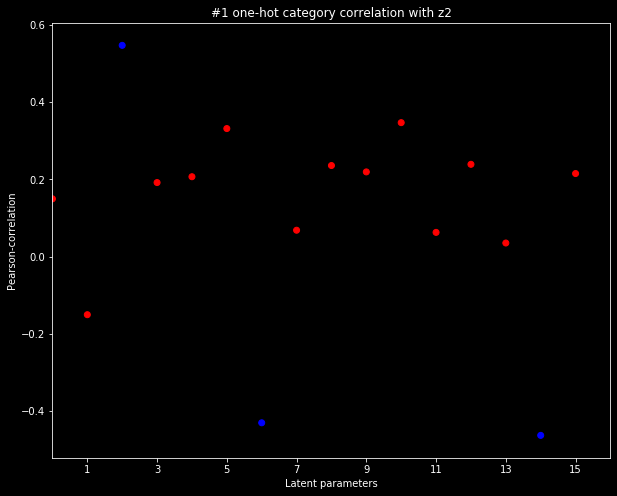

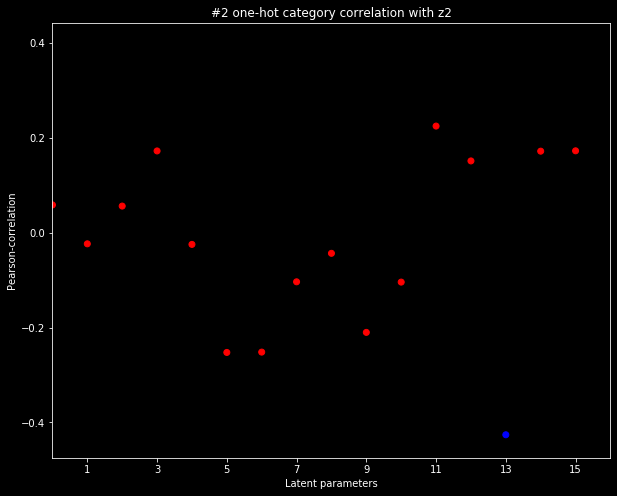

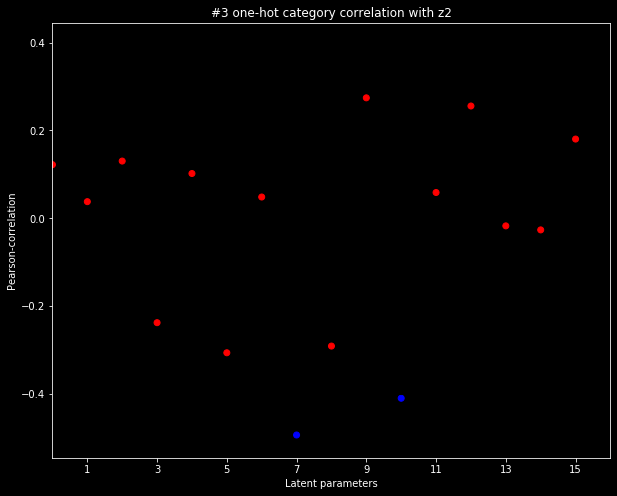

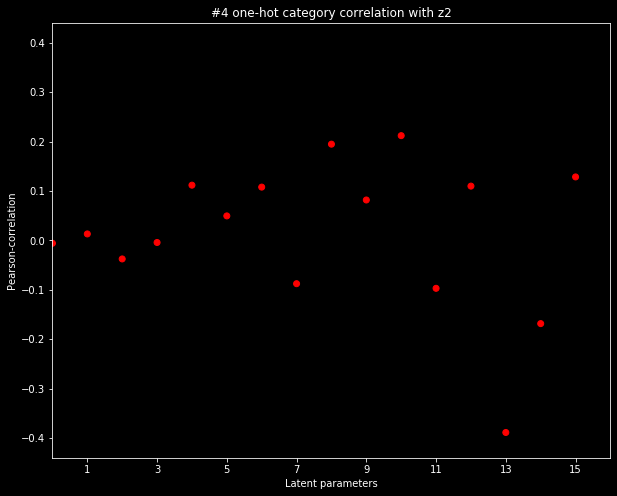

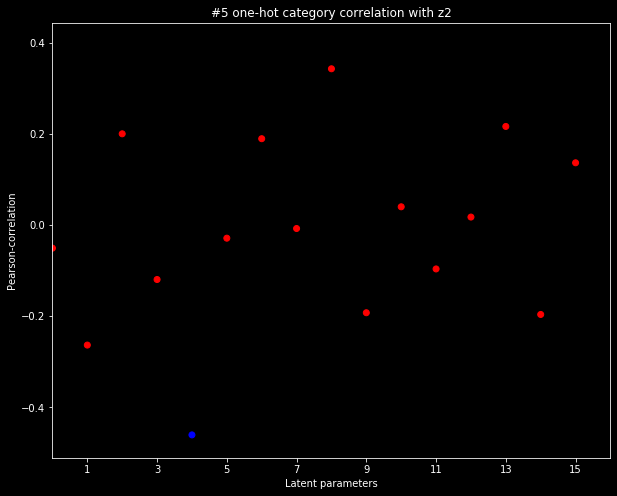

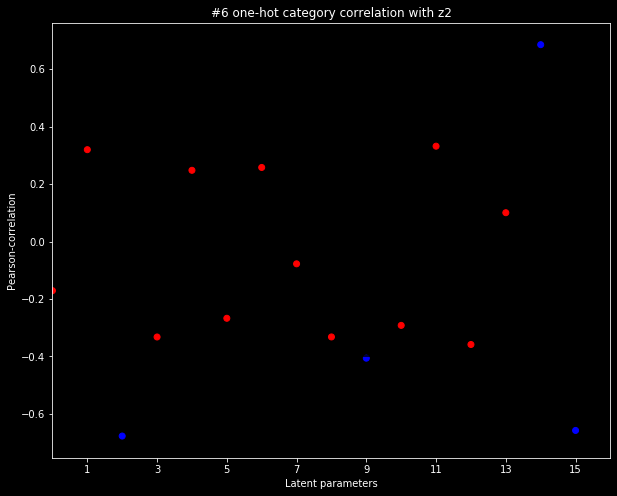

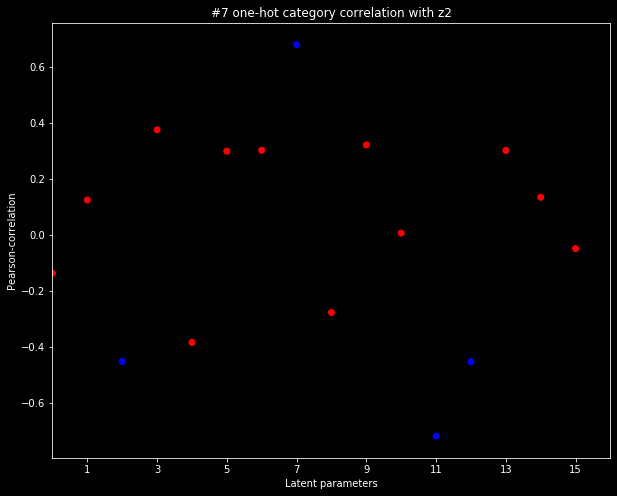

In [22]:
plotter.plot_label_correlations()

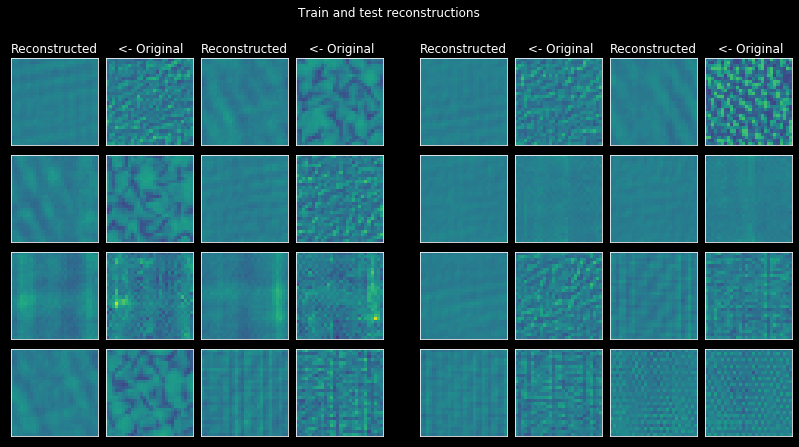

In [24]:
plotter.grid_plot()

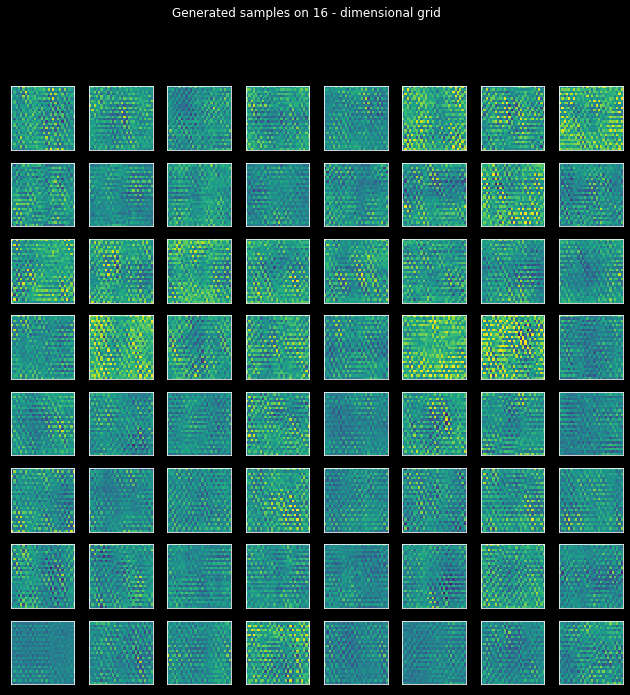

In [25]:
plotter.generate_samples(vmax=1)